In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import spatialmaps as sp
import septum_mec.analysis.data_processing as dp
from septum_mec.analysis.plotting import plot_psth, plot_waveforms
import expipe
import os
import pathlib
import numpy as np
import exdir
from scipy.interpolate import interp1d
import pandas as pd
import optogenetics as og
import quantities as pq

In [2]:
par = {'speed_filter': 5, # m/s
    'pos_fs': 100 ,
    'f_cut': 6 ,
    'spat_binsize': 0.02 ,
    'grid_stepsize': 0.1 ,
    'box_xlen': 1 ,
    'box_ylen': 1 ,
    'spike_size': 10,
    'field_max_wall_extent':0.1,
    'field_min_bins':12
}

binsize = par['spat_binsize']
smoothing = 0.03
plt.rcParams['figure.figsize'] = (16,9)

In [3]:
project_path = os.environ.get("SEPTUM_MEC_DATA")
if project_path is None:
    raise Exception("Need to set `SEPTUM_MEC_DATA` as environment variable first.")
else:
    project_path = pathlib.Path(project_path)

project = expipe.get_project(project_path)
actions = project.actions

In [5]:
def make_psth(sptr, epochs, t_stop):
    trials = og.tools.make_spiketrain_trials(sptr, epochs, t_start=-t_stop, t_stop=t_stop)
    plot_psth(trials=trials)
    plot_waveforms(sptr)

In [7]:
action_id = "1834-060319-2"
channel_id = 0

action  = actions[action_id]

data_path = pathlib.Path(project_path) / "actions" / action_id / "data" / "main.exdir"
root_group = exdir.File(
    data_path, plugins=[exdir.plugins.quantities, exdir.plugins.git_lfs])

x, y, t, speed = dp.load_tracking(data_path, par)

spike_trains = dp.load_spiketrains(data_path, channel_id)
epochs = dp.load_epochs(data_path)

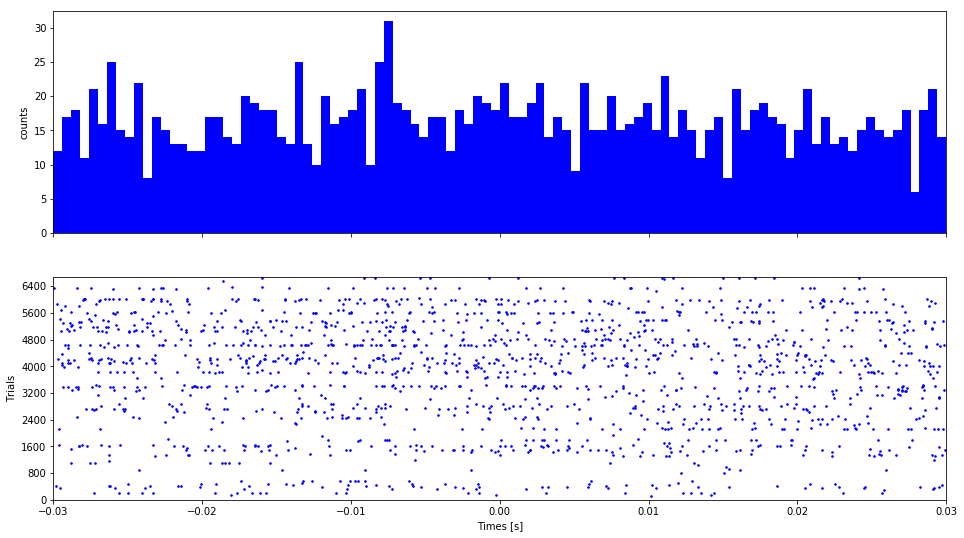

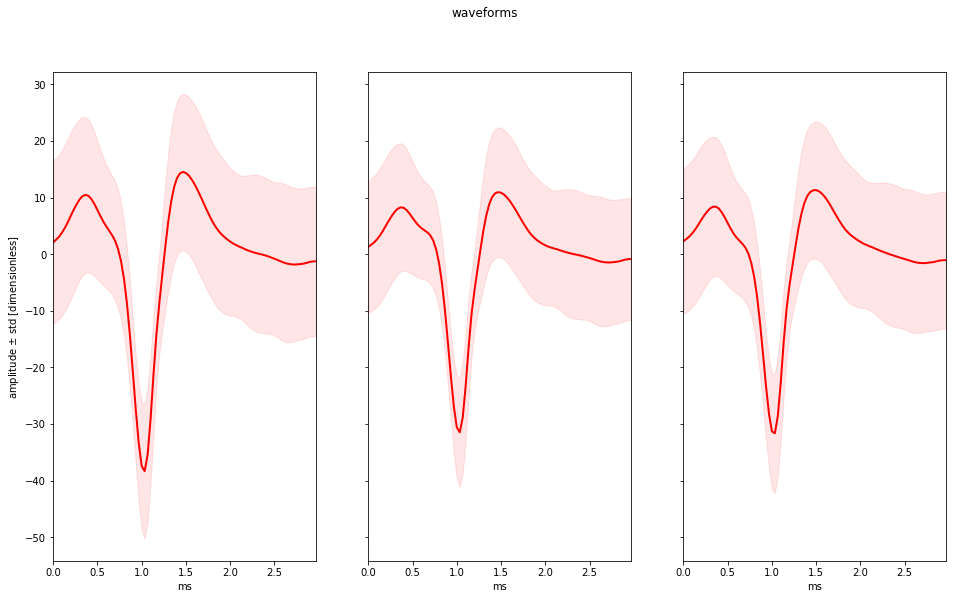

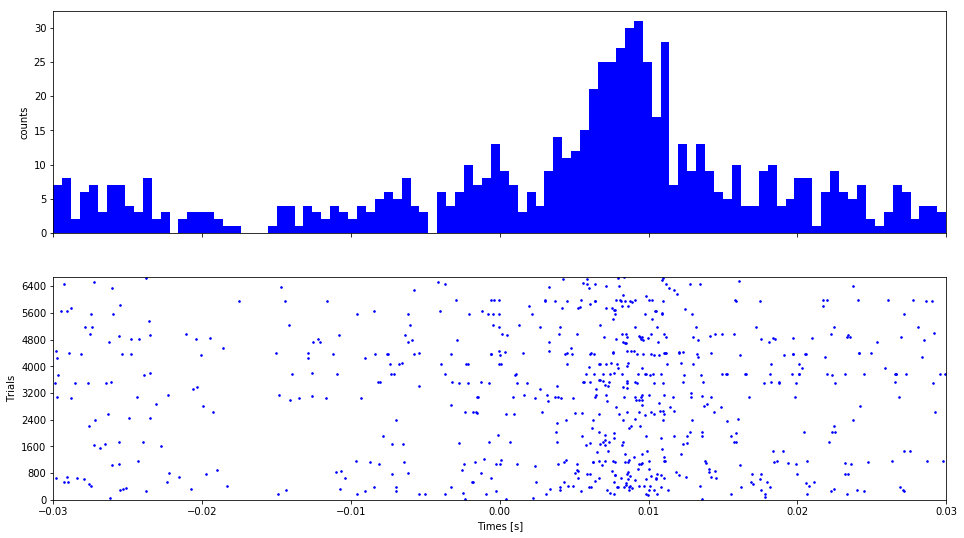

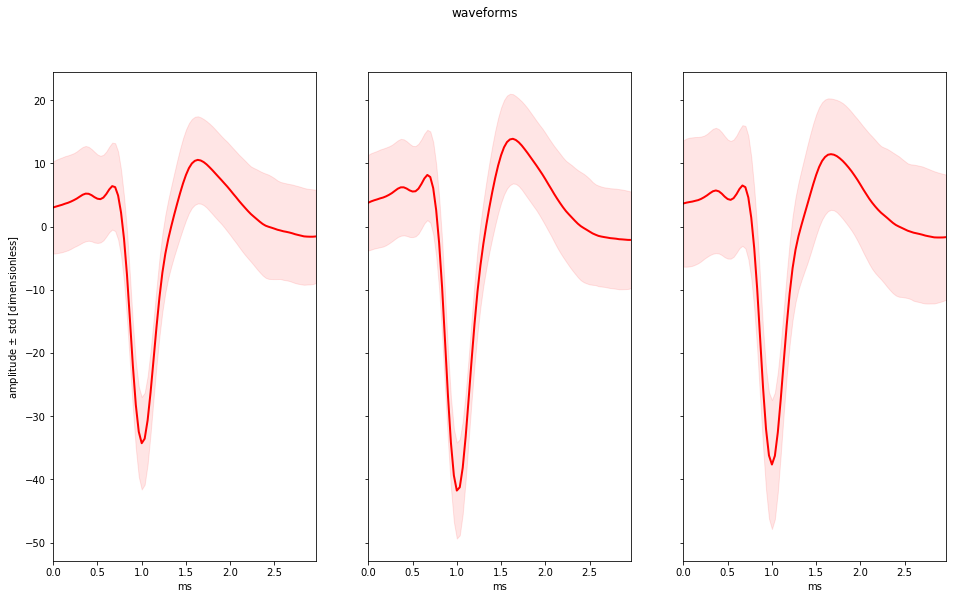

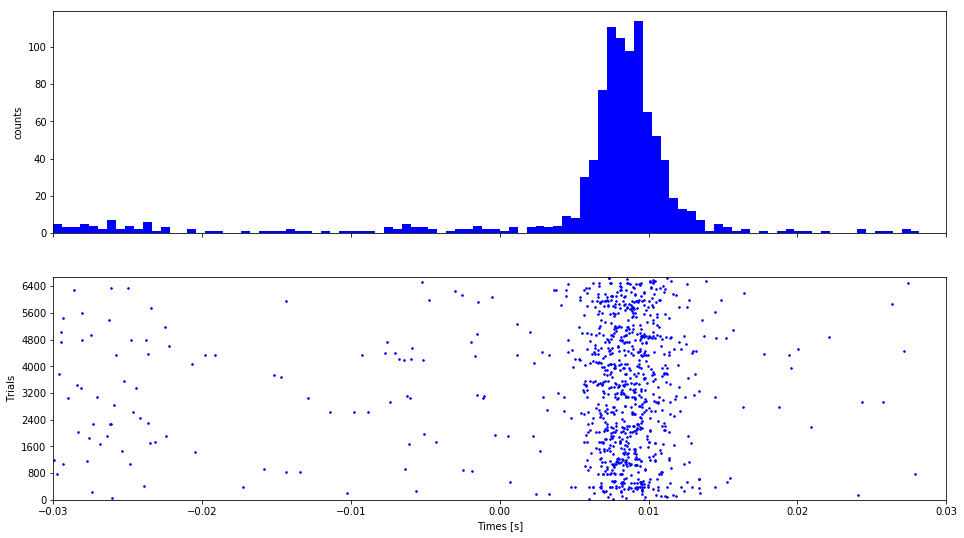

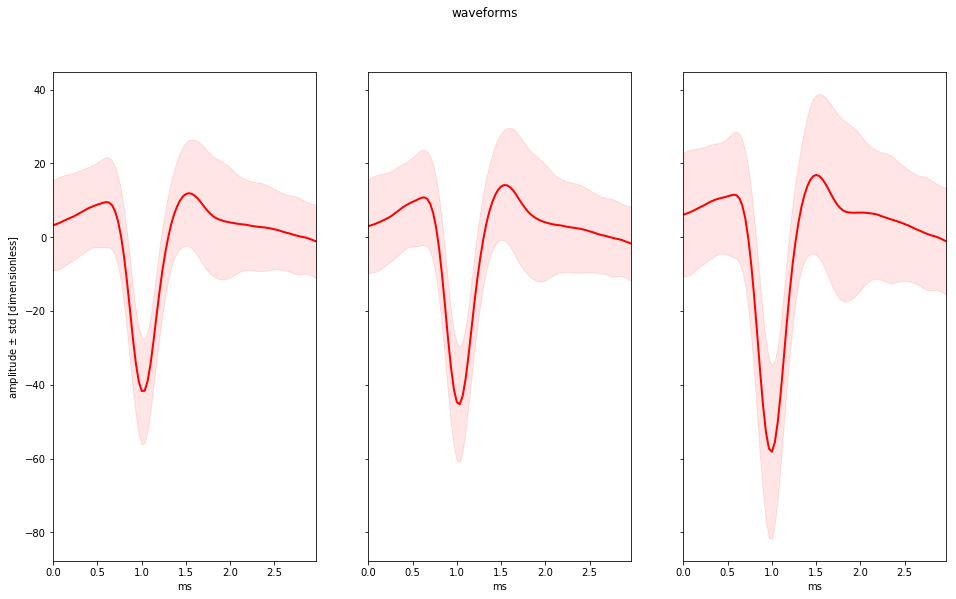

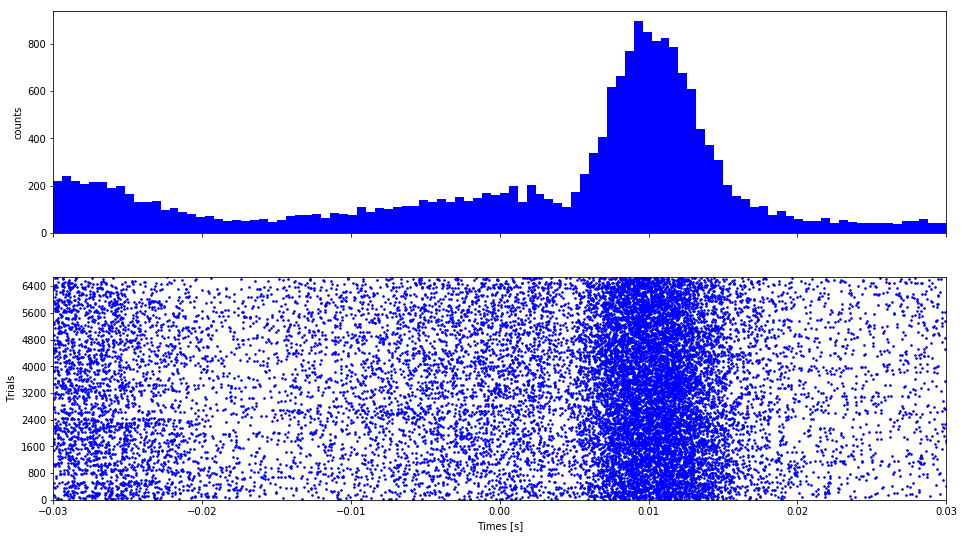

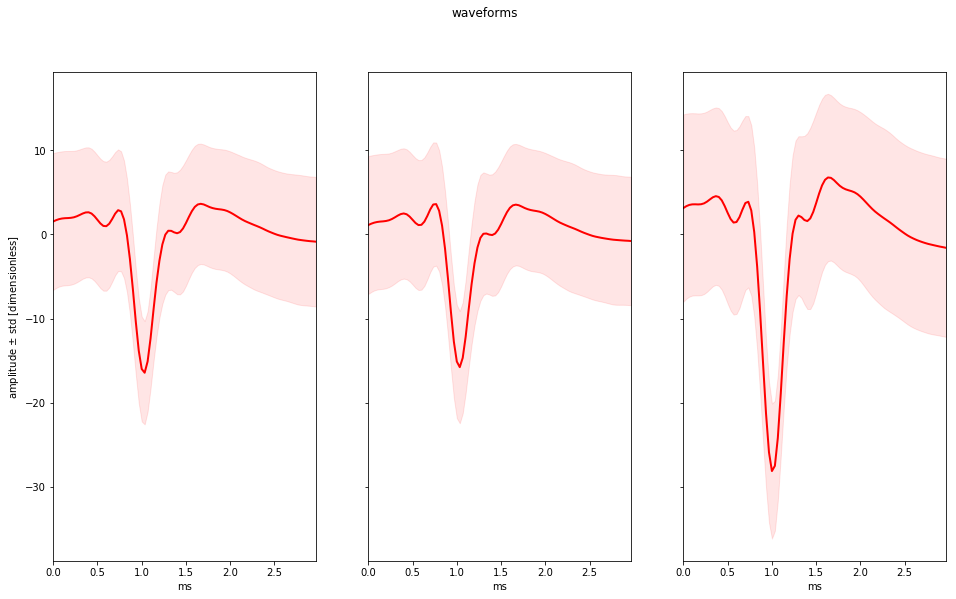

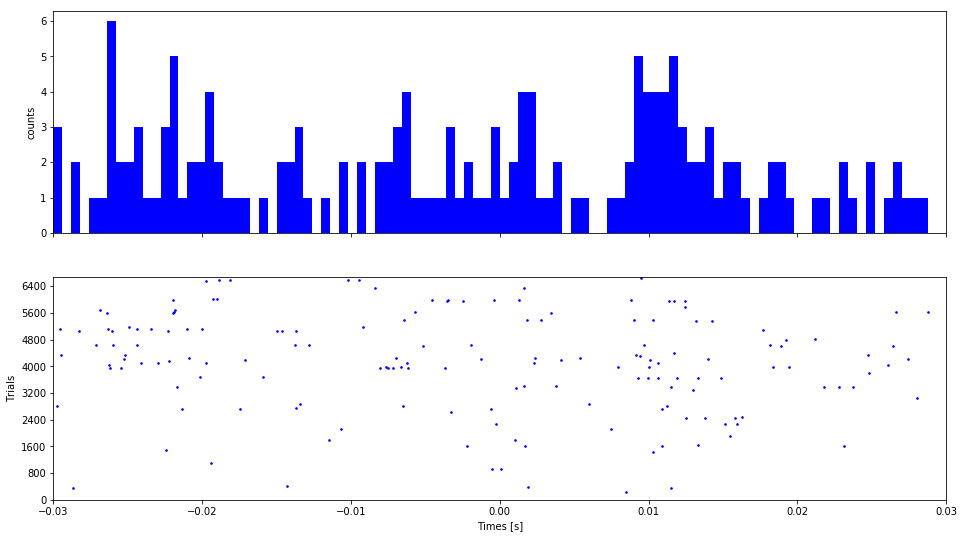

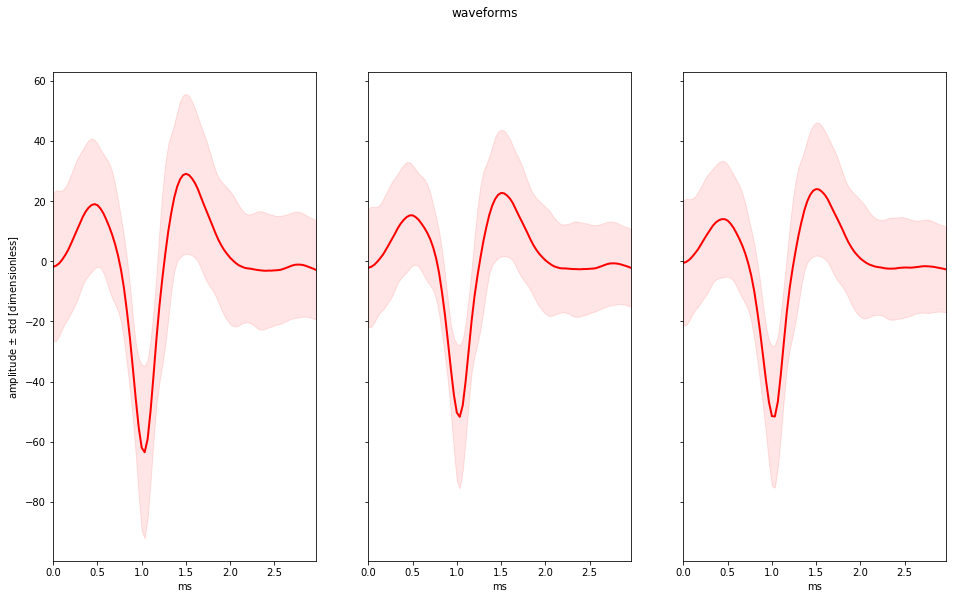

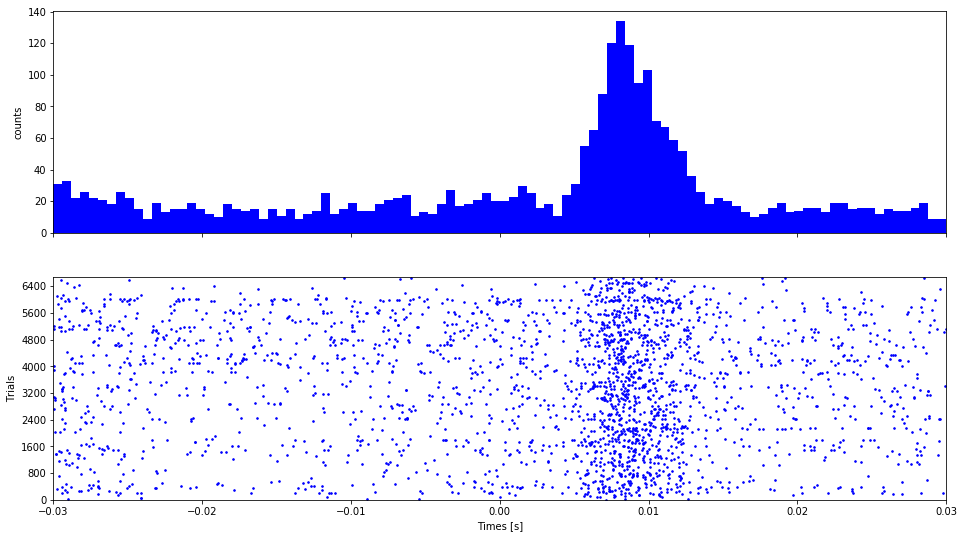

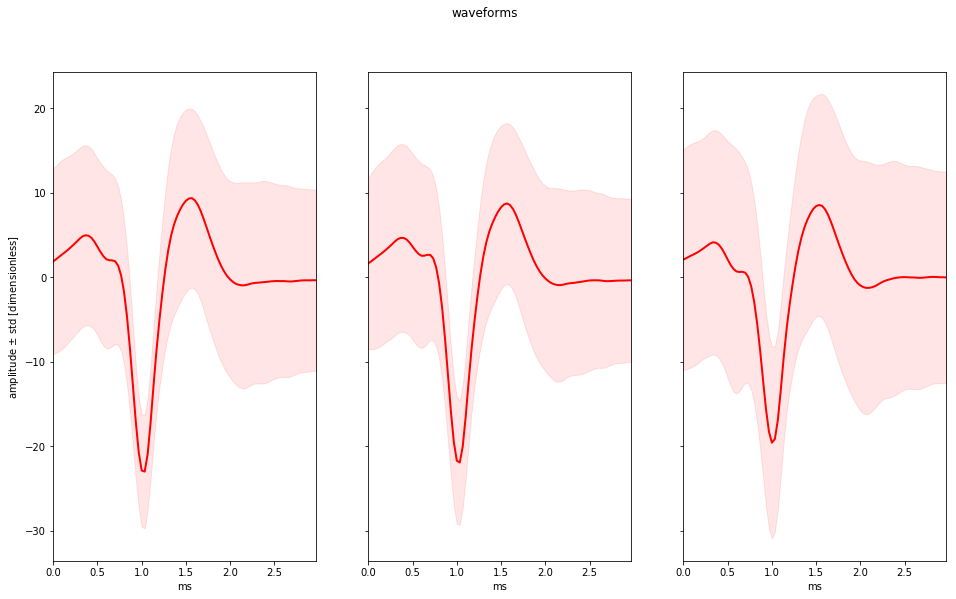

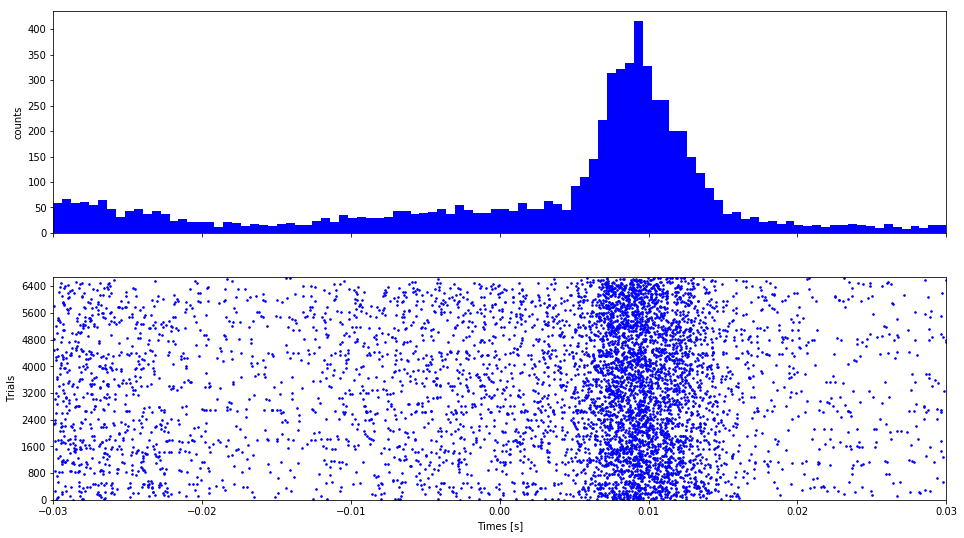

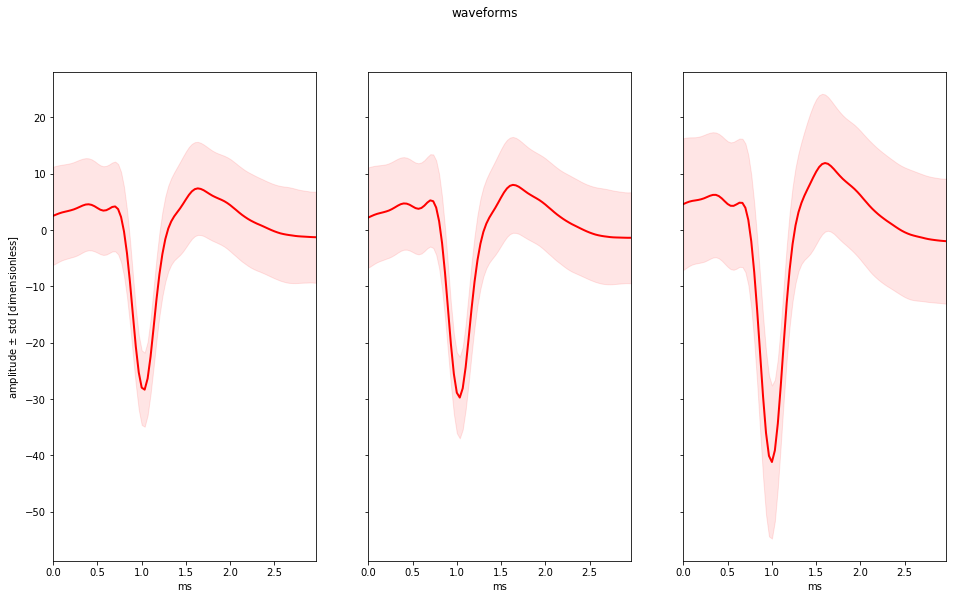

In [8]:
for spike_times in spike_trains:
    make_psth(spike_times,epochs[0], 0.03*pq.s)